In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [179]:

# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [180]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=["HDI for year", "country-year", "generation", "gdp_per_capita ($)", "suicides_no", "population"])

# drop rows with missing values
rough_df.dropna(how='any')

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides/100k pop":"Suicides/100k pop", " gdp_for_year ($) ":"GDP(Year)"})

# filter for years 2000-2016
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2010
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# Convert data type for GDP calculations 
filtered_date_df["GDP(Year)"] = filtered_date_df["GDP(Year)"].str.replace(',','').astype(int)

# Filter down countries 
target_countries= filtered_date_df.loc[(filtered_date_df['Country']== "United States")|  (filtered_date_df["Country"]== "Canada") | (filtered_date_df["Country"]== "Mexico") | (filtered_date_df["Country"]== "Antigua and Barbuda")|(filtered_date_df["Country"]== "Argentina")|(filtered_date_df["Country"]== "Bahamas")| (filtered_date_df["Country"]== "Barbados")|(filtered_date_df["Country"]== "Belize")|(filtered_date_df["Country"]== "Brazil")| (filtered_date_df["Country"]== "Chile")|(filtered_date_df["Country"]== "Colombia")|(filtered_date_df["Country"]== "Costa Rica")|(filtered_date_df["Country"]== "Cuba")| (filtered_date_df["Country"]== "Ecuador")|  (filtered_date_df["Country"]== "El Salvador")| (filtered_date_df["Country"]== "Grenada")| (filtered_date_df["Country"]== "Guatemala")| (filtered_date_df["Country"]== "Jamaica")|(filtered_date_df["Country"]== "Nicaragua")| (filtered_date_df["Country"]== "Panama")| (filtered_date_df["Country"]== "Paraguay")| (filtered_date_df["Country"]== "Puerto Rico")| (filtered_date_df["Country"]== "Saint Lucia")| (filtered_date_df["Country"]== "Saint Vincent and Grenadines")| (filtered_date_df["Country"]== "Suriname")| (filtered_date_df["Country"]== "Trinidad and Tobago")| (filtered_date_df["Country"] == "Uruguay"), :]

target_countries_df= pd.DataFrame(target_countries)

# Display table
target_countries_df.head()

,Country,Year,Sex,Age Range,Suicides/100k pop,GDP(Year)
420,Antigua and Barbuda,2000,male,55-74,30.00,830158778
421,Antigua and Barbuda,2000,male,35-54,9.97,830158778
422,Antigua and Barbuda,2000,female,15-24,0.00,830158778
423,Antigua and Barbuda,2000,female,25-34,0.00,830158778
424,Antigua and Barbuda,2000,female,35-54,0.00,830158778


In [258]:
# group by year and country / find averages

country_gdp = target_countries_df.groupby(["Year"])["GDP(Year)"].mean()



country_suicide = target_countries_df.groupby(["Year"])['Suicides/100k pop'].mean()

# create summary table
country_summary_df = pd.DataFrame({"GDP Mean": country_gdp, "Suicide Rate Mean": country_suicide})

country_summary_df["GDP Mean"] = country_summary_df["GDP Mean"].map("${:,.2f}".format)
country_summary_df["Suicide Rate Mean"] = country_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

country_summary_reset_df = country_summary_df.reset_index()

# display table
country_summary_reset_df


#country_summary_df

,Year,GDP Mean,Suicide Rate Mean
0,2000,"$523,374,607,282.52",8.98
1,2001,"$513,809,673,988.31",8.54
2,2002,"$520,495,832,680.35",8.74
3,2003,"$548,243,561,816.38",8.40
4,2004,"$593,083,518,206.50",8.08
5,2005,"$646,919,427,125.58",7.96
6,2006,"$698,477,655,388.73",7.92
7,2007,"$810,007,720,653.08",8.75
8,2008,"$811,550,167,667.20",8.41
9,2009,"$751,250,437,554.73",8.12


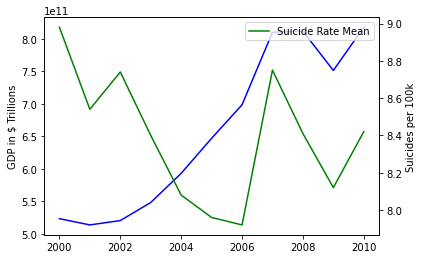

In [182]:
#import matplotlib.ticker as ticker
# Define axis
#x_axis = country_summary_reset_df["Year"]
#y_axis = country_summary_reset_df["Suicide Rate Mean"]

# Generate scatter plot
#plt.plot(x_axis, y_axis)

# Add labels and title
#plt.xlabel("Year")
#plt.ylabel("Suicide Rate Mean")
#plt.title("Suicide Rates in the Americas Over Time v. GDP")   

years = country_summary_reset_df['Year']
gdp_mean= country_summary_reset_df['GDP Mean']
suicide_rate= country_summary_reset_df['Suicide Rate Mean']

sui = []
gdpr = []
for rate in suicide_rate:
    rate = float(rate) 
    sui.append(rate)
for gdp in gdp_mean:
    gdp = gdp.replace(",", "")
    gdp = float(gdp[1:]) 
    gdpr.append(gdp)
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


# # Plot the world average as a line chart
# gdp = ax1.plot(years, gdpr , color="blue", label='GDP Mean')


# formatter = ticker.FormatStrFormatter('$%1.2f')
# ax1.yaxis.set_major_formatter(formatter)
# Plot the world average as a line chart
gdp = ax1.plot(years, gdpr , color="blue", label='GDP Mean')




# Plot the unemployment values for a single country
suicide_rate = ax2.plot(years, sui, color="green", label= 'Suicide Rate Mean')

ax1.set_ylabel('GDP in $ Trillions')



ax2.set_ylabel('Suicides per 100k')

# Create a legend for our chart
#plt.legend(handles=[gdp, suicide_rate], loc="best")

# Show the chart
#print(suicide_rate.dtypes)



plt.legend()
plt.show()



In [183]:
# Group by Country, Year, Ages / find averages
age_gdp = target_countries_df.groupby(["Age Range"])["GDP(Year)"].mean()
age_suicide = target_countries_df.groupby(["Age Range"])['Suicides/100k pop'].mean()

# Create summary table
age_summary_df = pd.DataFrame({"GDP Mean": age_gdp, "Suicide Rate Mean": age_suicide})

age_summary_df["GDP Mean"] = age_summary_df["GDP Mean"].map("${:,.2f}".format)
age_summary_df["Suicide Rate Mean"] = age_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

age_summary_reset_df = age_summary_df.reset_index()

# Display table
age_summary_reset_df

,Age Range,GDP Mean,Suicide Rate Mean
0,05-14,"$656,569,575,842.52",0.67
1,15-24,"$656,569,575,842.52",7.59
2,25-34,"$656,569,575,842.52",8.96
3,35-54,"$656,569,575,842.52",9.39
4,55-74,"$656,569,575,842.52",9.87
5,75+,"$656,569,575,842.52",13.85


In [184]:

age_summary_reset_df.plot.bar(color="b")
plt.title("title goes here")
plt.xlabel("GDP Mean")
plt.ylabel("Suicide Rate")

plt.show()
plt.tight_layout()

TypeError: no numeric data to plot

In [246]:

# Group by Country, Year, Sex / find averages
sex_gdp = filtered_date_df.groupby(["Sex"])["GDP(Year)"].mean()
sex_suicide = filtered_date_df.groupby(["Sex"])['Suicides/100k pop'].mean()

# Creat summary table
sex_summary_df = pd.DataFrame({"GDP Mean": sex_gdp, "Suicide Rate Mean": sex_suicide})

sex_summary_df["GDP Mean"] = sex_summary_df["GDP Mean"].map("${:,.2f}".format)
sex_summary_df["Suicide Rate Mean"] = sex_summary_df["Suicide Rate Mean"].map("{:,.2f}".format)

sex_summary_reset_df = sex_summary_df.reset_index()

# Display table
sex_summary_reset_df

,Sex,GDP Mean,Suicide Rate Mean
0,female,"$467,894,281,133.25",5.08
1,male,"$467,894,281,133.25",19.91


In [247]:
sex_summary_reset_df["Suicide Rate Mean"] = sex_summary_reset_df["Suicide Rate Mean"].astype(str)

sex_summary_reset_df['Sex']= sex_summary_reset_df['Sex'].astype(str)


sex_summary_reset_df.dtypes


Sex                  object
GDP Mean             object
Suicide Rate Mean    object
dtype: object

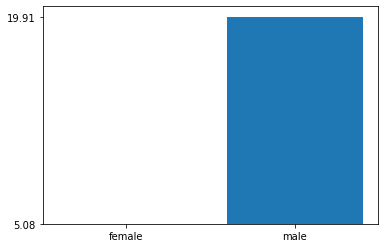

In [288]:
import math

sex_summary_reset_df["Suicide Rate Mean"] = sex_summary_reset_df["Suicide Rate Mean"].astype(str)



sex_summary_reset_df["Sex"] = pd.Categorical(sex_summary_reset_df["Sex"])

# Set the figure size
#plt.figure(figsize=(10, 10))

# Scatterplot
#plt.scatter(
   # x = sex_summary_reset_df["Sex"], 
    #y = sex_summary_reset_df["GDP Mean"], 
    #s = sex_summary_reset_df["Suicide Rate Mean"], 
    #c = sex_summary_reset_df["Country"].cat.codes, 
    #cmap="tab20", 
    #edgecolors="white", 
   # linewidth=2);
 
# Add titles (main and on axis)
#plt.yscale('log')
#plt.xlabel("Sex")
#plt.ylabel("GDP Mean")
#plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);







#fig, ax = plt.subplots() 

#ax.set(ylim=[0,20])
#for gdp in gdp_mean:
    #gdp = gdp.replace(",", "")
    #gdp = float(gdp[1:]) 
    #gdpr.append(gdp)

#f, ax = plt.subplots()





x = sex_summary_reset_df['Sex']

#sui= []
#for rate in suicide:
   # suicide = (suicide) 
   # sui.append(suicide)


suicide= sex_summary_reset_df['Suicide Rate Mean']


#low = min(y)
#high = max(y)
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
 



#low = min(y)
#high = max(y)
plt.bar(x, suicide, align = 'center')

plt.ylim(ymin=0)              
              


sui= []
for rate in suicide:
    suicide = str(suicide) 
    sui.append(suicide)
    
   
    
#ax.set(ylim=[0,20])    

# Display plot
plt.show()

In [19]:
#Are suicide rates higher in developing countries or developed countries?

#heatmap of suicide rates globally

In [20]:

#Country v.  Overall suicide rate


df_Country_Overall_suicide_rate = target_countries_df.groupby('Country')['Suicides/100k pop'].mean()
#filtered_date_df.head()

#define 'Overall suicide rate'

mean_sui2 = df_Country_Overall_suicide_rate.mean()
 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})
country_mean_df

,Country Mean,Global Mean,Deviation
Country,,,
Antigua and Barbuda,1.094000,8.252513,-7.158513
Argentina,10.629848,8.252513,2.377336
Bahamas,1.370455,8.252513,-6.882058
Barbados,1.062576,8.252513,-7.189937
Belize,7.019773,8.252513,-1.232740
Brazil,5.911136,8.252513,-2.341377
Canada,11.073788,8.252513,2.821275
Chile,12.982879,8.252513,4.730366
Colombia,6.563030,8.252513,-1.689483


In [10]:
#Gender v. Country & Suicide rate
Gender_tmp_df = target_countries_df.groupby(['Country','Sex'])['Suicides/100k pop'].mean()


Gender_tmp_df.head()

Country              Sex   
Antigua and Barbuda  female     0.185952
                     male       1.562857
Argentina            female     3.373229
                     male      16.998958
Bahamas              female     0.443929
Name: Suicides/100k pop, dtype: float64

In [11]:
#Age Range v. Country & Suicide rate
Age_tmp_df = target_countries_df.groupby(['Country','Age Range'])['Suicides/100k pop'].mean()

Age_tmp_df

Country              Age Range
Antigua and Barbuda  05-14         0.000000
                     15-24         0.000000
                     25-34         0.000000
                     35-54         1.648929
                     55-74         3.597500
                                    ...    
Uruguay              15-24        15.145333
                     25-34        17.936000
                     35-54        20.285667
                     55-74        28.078333
                     75+          47.024667
Name: Suicides/100k pop, Length: 162, dtype: float64

In [ ]:
#suicide rates in the United States for 2017-2019?

In [ ]:
#Aggrate data by gender/gdp & suicide rate for 2017-2019

In [ ]:
#Aggrate Data by gender/gdp & suicide rate for 2017-2019